In [3]:
# GAN Assignment:

In [4]:
#  Step 1: Install & Import Required Libraries

In [5]:
!pip install torch torchvision matplotlib --quiet

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00


In [6]:
# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
 # Step 2: Set Hyperparameters

In [8]:
latent_dim = 100
lr = 0.0002
batch_size = 128
epochs = 30

In [9]:
# Step 3: Load MNIST Dataset

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.35MB/s]


In [11]:
# Step 4: Define Generator & Discriminator

In [12]:
# Generator
class Generator(nn.Module):
    def __init__(self, z_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

In [13]:
# Step 5: Initialize Networks & Optimizers

In [14]:
G = Generator(latent_dim).to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=lr)
opt_D = optim.Adam(D.parameters(), lr=lr)

In [15]:
# Step 6: Train the GAN

Epoch [1/30] | D Loss: 1.0889 | G Loss: 0.8803
Epoch [2/30] | D Loss: 1.2104 | G Loss: 0.7872
Epoch [3/30] | D Loss: 1.0713 | G Loss: 0.9954
Epoch [4/30] | D Loss: 1.4286 | G Loss: 0.7433
Epoch [5/30] | D Loss: 0.6438 | G Loss: 1.4921
Epoch [6/30] | D Loss: 0.7260 | G Loss: 1.5267
Epoch [7/30] | D Loss: 0.9647 | G Loss: 1.0427
Epoch [8/30] | D Loss: 1.4562 | G Loss: 1.0024
Epoch [9/30] | D Loss: 0.9427 | G Loss: 1.0115
Epoch [10/30] | D Loss: 1.0987 | G Loss: 0.9623


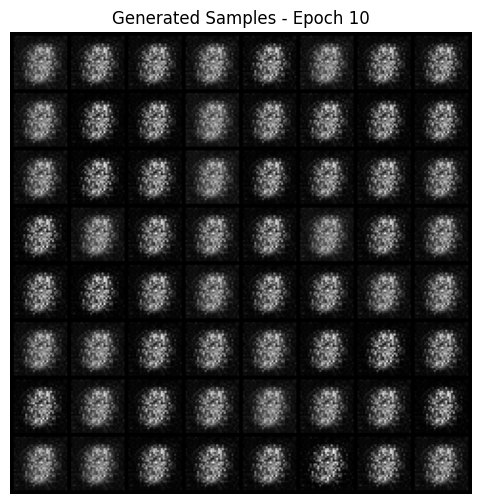

Epoch [11/30] | D Loss: 0.7943 | G Loss: 1.4108
Epoch [12/30] | D Loss: 1.1477 | G Loss: 1.1493
Epoch [13/30] | D Loss: 1.0813 | G Loss: 0.9305
Epoch [14/30] | D Loss: 1.1381 | G Loss: 1.1769
Epoch [15/30] | D Loss: 1.3341 | G Loss: 1.0562
Epoch [16/30] | D Loss: 0.6512 | G Loss: 1.5134
Epoch [17/30] | D Loss: 0.9693 | G Loss: 1.1636
Epoch [18/30] | D Loss: 1.3161 | G Loss: 1.0809
Epoch [19/30] | D Loss: 1.7307 | G Loss: 0.9342
Epoch [20/30] | D Loss: 0.9839 | G Loss: 1.0492


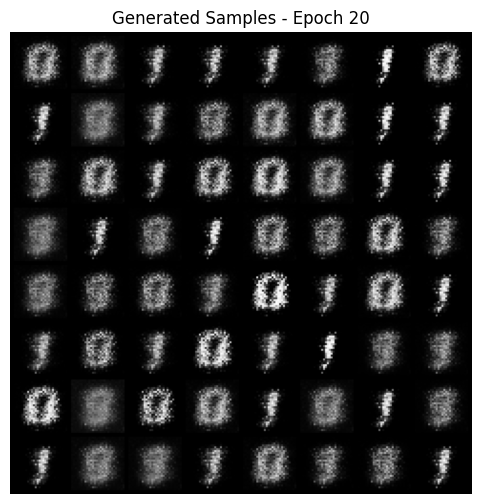

Epoch [21/30] | D Loss: 1.2421 | G Loss: 0.9824
Epoch [22/30] | D Loss: 1.7900 | G Loss: 0.7442
Epoch [23/30] | D Loss: 1.0423 | G Loss: 1.2492
Epoch [24/30] | D Loss: 1.4130 | G Loss: 0.8526
Epoch [25/30] | D Loss: 0.9751 | G Loss: 1.4030
Epoch [26/30] | D Loss: 0.9382 | G Loss: 1.2067
Epoch [27/30] | D Loss: 0.9102 | G Loss: 1.2807
Epoch [28/30] | D Loss: 1.6711 | G Loss: 0.8991
Epoch [29/30] | D Loss: 0.8819 | G Loss: 1.5097
Epoch [30/30] | D Loss: 0.6431 | G Loss: 1.4575


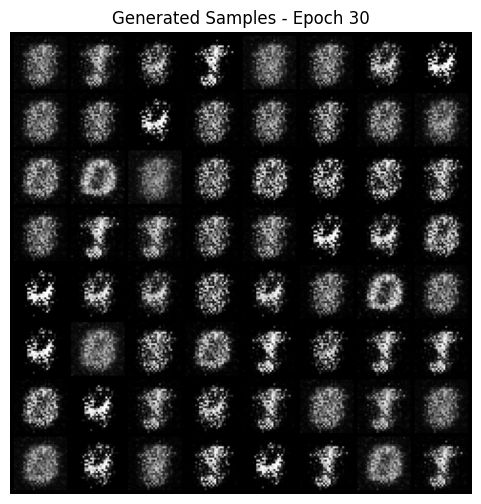

In [16]:
real_label = 1.
fake_label = 0.

for epoch in range(epochs):
    for real_imgs, _ in train_loader:
        real_imgs = real_imgs.to(device)
        b_size = real_imgs.size(0)

        ### Train Discriminator
        z = torch.randn(b_size, latent_dim).to(device)
        fake_imgs = G(z)

        real_output = D(real_imgs)
        fake_output = D(fake_imgs.detach())

        real_loss = criterion(real_output, torch.full_like(real_output, real_label))
        fake_loss = criterion(fake_output, torch.full_like(fake_output, fake_label))
        loss_D = real_loss + fake_loss

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        ### Train Generator
        z = torch.randn(b_size, latent_dim).to(device)
        fake_imgs = G(z)
        output = D(fake_imgs)

        loss_G = criterion(output, torch.full_like(output, real_label))

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")

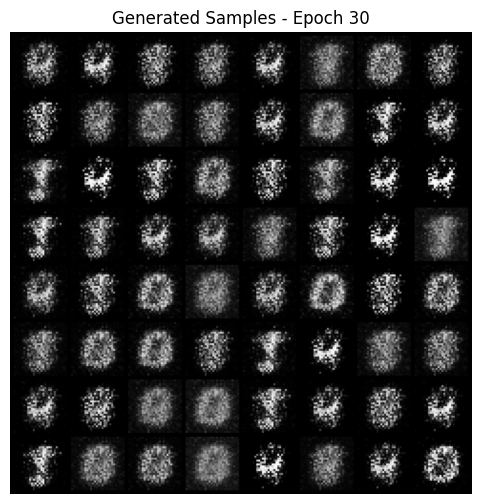

In [18]:
    # Show samples every 10 epochs
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            test_z = torch.randn(64, latent_dim).to(device)
            generated = G(test_z)
            grid = make_grid(generated, nrow=8, normalize=True)
            plt.figure(figsize=(6,6))
            plt.axis("off")
            plt.title(f"Generated Samples - Epoch {epoch+1}")
            plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
            plt.show()

          ASSIGNMENT COMPLETED